# Lab 1

This lab is for practicing Python’s *generators* and the design of *streaming* algorithms in general. We’re going to a sample Citibike's data set: **citibike.csv**, which is available on our class resources under *Data Sets*.

In [1]:
import csv
import datetime
import dateutil
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_color_codes("muted")

## Task 1

Plotting the number of trips taken by hour of the day in '''citibike.csv'''. In this task, we would write a generator to convert each line of an input citibike CSV into a stream of “hour of the day” values.

In [2]:
histogram = {}
with open('citibike.csv','r') as f:
    for line in csv.DictReader(f):
        hour = int(line['starttime'].split(' ')[1].split(':')[0])
        histogram[hour]=histogram.get(hour,0)+1
print(histogram)

{0: 401, 1: 248, 2: 117, 3: 89, 4: 89, 5: 293, 6: 988, 7: 2037, 8: 3668, 9: 3108, 10: 2241, 11: 2090, 12: 2289, 13: 2443, 14: 2685, 15: 2856, 16: 3471, 17: 4788, 18: 4270, 19: 2839, 20: 1844, 21: 1343, 22: 1192, 23: 811}


In [3]:
def extractHour(filename):
    with open('citibike.csv','r') as f:
        for line in csv.DictReader(f):
            yield int(line['starttime'].split(' ')[1].split(':')[0])

histogram = {}
for hour in extractHour('citibike.csv'):
    histogram[hour]=histogram.get(hour,0)+1

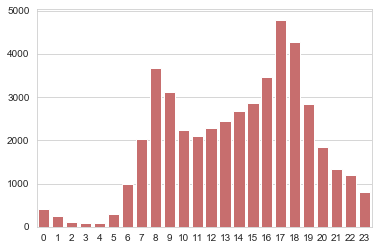

In [4]:
sns.barplot(x=list(histogram.keys()),y=list(histogram.values()),color='r')

## Task 2

Our task is to write a generator to extract the first ride of the day from a Citibike data stream. The data stream is sorted based on starting times. The first ride of the day is interpreted as the ride with the earliest starting time of a day.

We are given a template with the sample generator **firstRide**. The generator currently takes in **csv.DictReader** generator and output its first element. We need to adjust this generator to output the first ride of the day for the entire stream as specified above. The output of the generator must be in the same format as csv.DictReader. We can think of this generator as a filter only passing certain records through.

In [5]:
### NOTE: We need to change the body of the generator firstRide
### in order to output trip record that appeared first in each day
### using the same dict format as csv.DictReader.

def firstRide(reader):
    our = None
    for line in reader:
        day = line['starttime'].split(' ')[0]
        if day != our:
            our = day
            yield line

### NOTE: We SHOULD NOT modify the code below. If we
### write our firstRide generator above correctly, the
### code below will output the correct information

with open('citibike.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    for row in firstRide(reader):
        print(','.join(map(row.get, reader.fieldnames)))

1,,801,2015-02-01 00:00:00+00,2015-02-01 00:14:00+00,521,8 Ave & W 31 St,40.75044999,-73.99481051,423,W 54 St & 9 Ave,40.76584941,-73.98690506,17131,Subscriber,1978,2
6442,,199,2015-02-02 00:02:00+00,2015-02-02 00:05:00+00,442,W 27 St & 7 Ave,40.746647,-73.993915,489,10 Ave & W 28 St,40.75066386,-74.00176802,20684,Subscriber,1992,1
7901,,704,2015-02-03 00:00:00+00,2015-02-03 00:12:00+00,387,Centre St & Chambers St,40.71273266,-74.0046073,2008,Little West St & 1 Pl,40.70569254,-74.01677685,20328,Subscriber,1982,1
12655,,146,2015-02-04 00:00:00+00,2015-02-04 00:02:00+00,237,E 11 St & 2 Ave,40.73047309,-73.98672378,438,St Marks Pl & 1 Ave,40.72779126,-73.98564945,15253,Subscriber,1969,1
21628,,1034,2015-02-05 00:00:00+00,2015-02-05 00:17:00+00,497,E 17 St & Broadway,40.73704984,-73.99009296,461,E 20 St & 2 Ave,40.73587678,-73.98205027,20290,Subscriber,1971,1
30836,,212,2015-02-06 00:01:00+00,2015-02-06 00:05:00+00,491,E 24 St & Park Ave S,40.74096374,-73.98602213,472,E 32 St & Park Ave,40